In [2]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt

In [60]:
! ls ..

BERTanalysis	    scai_test_rels.tsv
allrels.csv	    scai_test_results.pickle
analysis	    scai_test_spacy_bionlp13cg_results.pickle
database	    scai_test_spacy_large_results.pickle
mongodb		    scai_test_test
nbs		    scai_test_train
neutrophils	    scai_train_rels.tsv
plots		    scai_train_results.pickle
prediction	    scai_train_spacy_large_results.pickle
pubmed		    server
relexfiles	    synonymes
rels_allchecks.tsv  textdb
scai_res	    textmining
scai_res2	    utils
scai_test


In [3]:
trainResults = pickle.load(open("../scai_train_results.pickle", 'rb'))
testResults = pickle.load(open("../scai_test_results.pickle", 'rb'))

trainResultsSpacyLarge = pickle.load(open("../scai_test_spacy_large_results.pickle", 'rb'))
testResultsSpacyLarge = pickle.load(open("../scai_train_spacy_large_results.pickle", 'rb'))

trainResultsSpacyBionlp = pickle.load(open("../scai_test_spacy_bionlp13cg_results.pickle", 'rb'))
testResultsSpacyBionlp = pickle.load(open("../scai_train_spacy_bionlp13cg_results.pickle", 'rb'))


all_runs = {
    ("ProMiner",): {"precision": 0.41, "recall": 0.45},
    ("miRTex",): {"precision": 0.92, "recall": 0.82},
    ("ReLeX",): {"precision": 0.84, "recall": 0.45},
    ("miRSel",): {"precision": 0.55, "recall": 1.0},
    ("miRExplore/atheMir",): {"precision": 0.72, "recall": 0.77},
    
    #('scispacy_large_train',): trainResults[('conj','sdp','compartment','context')],
    ('scispacy_large_test',): testResults[('conj','sdp','compartment','context')],
    
    #('spacy_large_train',): trainResultsSpacyLarge[('conj','sdp','compartment','context')],
    ('spacy_large_test',): testResultsSpacyLarge[('conj','sdp','compartment','context')],
    
    #('spacy_bionlp_train',): trainResultsSpacyBionlp[('conj','sdp','compartment','context')],
    ('spacy_bionlp_test',): testResultsSpacyBionlp[('conj','sdp','compartment','context')],
}

In [4]:
# -*- coding: utf-8 -*-
"""
Script to plot recall-precision values with f-measure equi-potential lines.

Created on Dec 16, 2009

@author: Jörn Hees
"""

import pylab as pl
import itertools as it
import numpy as np

def fmeasure(p, r):
    """Calculates the fmeasure for precision p and recall r."""
    return 2*p*r / (p+r)


def _fmeasureCurve(f, p):
    """For a given f1 value and precision get the recall value.

    The f1 measure is defined as: f(p,r) = 2*p*r / (p + r).

    If you want to plot "equipotential-lines" into a precision/recall diagramm
    (recall (y) over precision (x)), for a given fixed f value we get this
    function by solving for r:
    """
    return f * p / (2 * p - f)


def _plotFMeasures(fstepsize=.1, stepsize=0.001):
    """Plots 10 fmeasure Curves into the current canvas."""
    p = np.arange(0., 1., stepsize)[1:]
    for f in np.arange(0., 1., fstepsize)[1:]:
        points = [(x, _fmeasureCurve(f, x)) for x in p
                  if 0 < _fmeasureCurve(f, x) <= 1.5]
        xs, ys = zip(*points)
        curve, = pl.plot(xs, ys, "--", color="gray", linewidth=0.5)  # , label=r"$f=%.1f$"%f) # exclude labels, for legend
        # bad hack:
        # gets the 10th last datapoint, from that goes a bit to the left, and a bit down
        pl.annotate(r"$f=%.1f$" % f, xy=(xs[-10], ys[-10]), xytext=(xs[-10] - 0.05, ys[-10] - 0.035), size="small", color="gray")

# def _contourPlotFMeasure():
#    delta = 0.01
#    x = np.arange(0.,1.,delta)
#    y = np.arange(0.,1.,delta)
#    X,Y = np.meshgrid(x,y)
#    cs = pl.contour(X,Y,fmeasure,np.arange(0.1,1.0,0.1)) # FIXME: make an array out of fmeasure first
#    pl.clabel(cs, inline=1, fontsize=10)



# # if you don't believe the prime loop:
# icons = set()
# for i,j in it.izip(it.cycle(colors),it.cycle(markers)):
#    if (i,j) in icons: break
#    icons.add((i,j))
# print len(icons), len(colors)*len(markers)


def plotPrecisionRecallDiagram(title="title", points=None, labels=None, loc="center right"):
    """Plot (precision,recall) values with 10 f-Measure equipotential lines.

    Plots into the current canvas.
    Points is a list of (precision,recall) pairs.
    Optionally you can also provide labels (list of strings), which will be
    used to create a legend, which is located at loc.
    """
    if labels:
        ax = pl.axes([0.1, 0.1, 0.7, 0.8])  # llc_x, llc_y, width, height
    else:
        ax = pl.gca()
    pl.title(title)
    pl.xlabel("Precision")
    pl.ylabel("Recall")
    _plotFMeasures()

    # _contourPlotFMeasure()
    
    colors = "bgrcmyk"  # 7 is a prime, so we'll loop over all combinations of colors and markers, when zipping their cycles
    markers = "so^>v<dph8"  # +x taken out, as no color.

    if points:

        scps = []  # scatter points
        for i, (x, y, f1) in enumerate(points):
            label = None
            if labels:
                label = labels[i]
            print(i, x, y, f1, label)
            scp = ax.scatter(x, y, label=label, s=50, linewidths=0.75, facecolor=colors[i % len(colors)], alpha=0.75, marker=markers[i % len(markers)])
            scps.append(scp)
            # pl.plot(x,y, label=label, marker=getMarker(), markeredgewidth=0.75, markerfacecolor=getColor())
            # if labels: pl.text(x, y, label, fontsize="x-small")
        if labels:
            # pl.legend(scps, labels, loc=loc, scatterpoints=1, numpoints=1, fancybox=True) # passing scps & labels explicitly to work around a bug with legend seeming to miss out the 2nd scatterplot
            pl.legend(scps, labels, loc=(1.01, 0), scatterpoints=1, numpoints=1, fancybox=True)  # passing scps & labels explicitly to work around a bug with legend seeming to miss out the 2nd scatterplot
    pl.axis([-0.02, 1.02, -0.02, 1.02])  # xmin, xmax, ymin, ymax

def plot_results(inres, title):
    
    plt.figure(figsize=(10,6))
    
    prList = []
    labels = []
    
    for x in inres:
                
        prec = inres[x]["precision"]
        recall = inres[x]["recall"]
                
        f1 = inres[x]["f1"]
        labels.append(";".join(x))
        
        prList.append((prec, recall, f1))

    plotPrecisionRecallDiagram(title, prList, labels)
    
    titlename = title.lower()
    
    for x in [",", "(", ")"]:
        titlename = titlename.replace(x, "")
        
    
    titlename = "_".join(titlename.split())
    
    plt.savefig(titlename + ".png", bbox_inches="tight")
        
    plt.show()
    plt.close()

<ipython-input-4-d77040a33d59>:28: RuntimeWarning: divide by zero encountered in double_scalars
  return f * p / (2 * p - f)


0 0.48866498740554154 1.0 0.6565143824027072 
1 0.5 0.9690721649484536 0.6596491228070175 conj
2 0.5173333333333333 1.0 0.6818980667838314 sdp
3 0.6505190311418685 0.9690721649484536 0.7784679089026916 compartment
4 0.6538461538461539 0.9639175257731959 0.7791666666666667 context
5 0.5310734463276836 0.9690721649484536 0.6861313868613139 conj;sdp
6 0.6752767527675276 0.9432989690721649 0.7870967741935484 conj;compartment
7 0.6728624535315985 0.9329896907216495 0.7818574514038876 conj;context
8 0.6861313868613139 0.9690721649484536 0.8034188034188036 sdp;compartment
9 0.677536231884058 0.9639175257731959 0.7957446808510639 sdp;context
10 0.8457943925233645 0.9329896907216495 0.8872549019607844 compartment;context
11 0.71484375 0.9432989690721649 0.8133333333333332 conj;sdp;compartment
12 0.6988416988416989 0.9329896907216495 0.7991169977924946 conj;sdp;context
13 0.88 0.9072164948453608 0.8934010152284264 conj;compartment;context
14 0.8660287081339713 0.9329896907216495 0.89826302729528

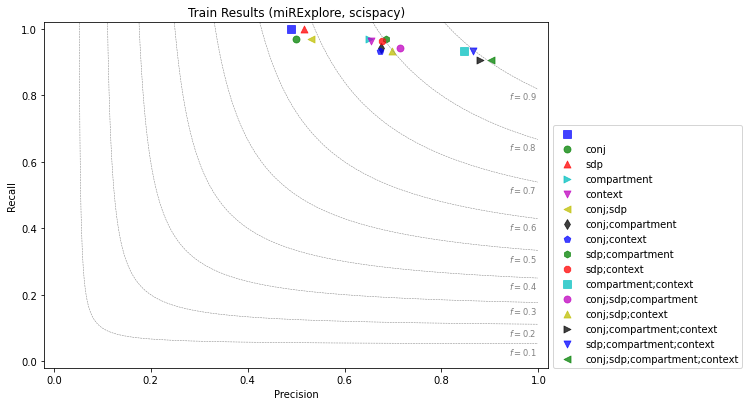

In [5]:
plot_results(trainResults, "Train Results (miRExplore, scispacy)")

<ipython-input-4-d77040a33d59>:28: RuntimeWarning: divide by zero encountered in double_scalars
  return f * p / (2 * p - f)


0 0.5948275862068966 1.0 0.745945945945946 
1 0.6586538461538461 0.9927536231884058 0.7919075144508669 conj
2 0.6052631578947368 1.0 0.7540983606557378 sdp
3 0.7486033519553073 0.9710144927536232 0.8454258675078865 compartment
4 0.6585365853658537 0.9782608695652174 0.7871720116618076 context
5 0.6715686274509803 0.9927536231884058 0.8011695906432749 conj;sdp
6 0.8525641025641025 0.9637681159420289 0.9047619047619047 conj;compartment
7 0.7282608695652174 0.9710144927536232 0.8322981366459627 conj;context
8 0.7570621468926554 0.9710144927536232 0.8507936507936508 sdp;compartment
9 0.6716417910447762 0.9782608695652174 0.7964601769911505 sdp;context
10 0.8291139240506329 0.9492753623188406 0.8851351351351351 compartment;context
11 0.8636363636363636 0.9637681159420289 0.910958904109589 conj;sdp;compartment
12 0.7444444444444445 0.9710144927536232 0.8427672955974843 conj;sdp;context
13 0.9420289855072463 0.9420289855072463 0.9420289855072463 conj;compartment;context
14 0.8397435897435898 

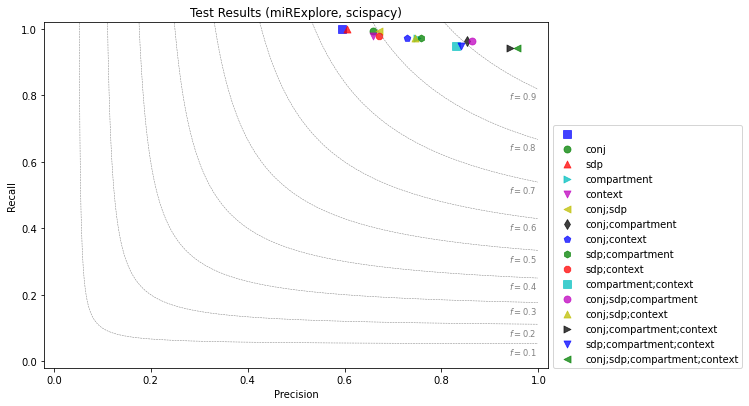

In [6]:
plot_results(testResults, "Test Results (miRExplore, scispacy)")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 0.5948275862068966 1.0 0.745945945945946 
1 0.6210045662100456 0.9855072463768116 0.761904761904762 conj
2 0.5857142857142857 0.8913043478260869 0.7068965517241379 sdp
3 0.7055214723926381 0.8333333333333334 0.7641196013289037 compartment
4 0.6415094339622641 0.9855072463768116 0.7771428571428571 context
5 0.6142131979695431 0.8768115942028986 0.7223880597014924 conj;sdp
6 0.7533333333333333 0.8188405797101449 0.7847222222222221 conj;compartment
7 0.6733668341708543 0.9710144927536232 0.795252225519288 conj;context
8 0.6866666666666666 0.7463768115942029 0.7152777777777777 sdp;compartment
9 0.6335078534031413 0.8768115942028986 0.7355623100303952 sdp;context
10 0.7808219178082192 0.8260869565217391 0.8028169014084506 compartment;context
11 0.7372262773722628 0.7318840579710145 0.7345454545454545 conj;sdp;compartment
12 0.6685393258426966 0.8623188405797102 0.7531645569620253 conj;sdp;context
13 0.8421052631578947 0.8115942028985508 0.8265682656826568 conj;compartment;context
14 0.761

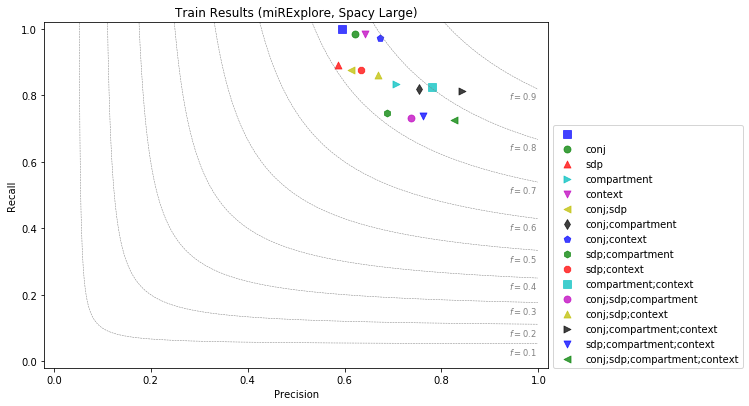

In [48]:
plot_results(trainResultsSpacyLarge, "Train Results (miRExplore, Spacy Large)")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 0.48866498740554154 1.0 
1 0.5093333333333333 0.9845360824742269 conj
2 0.504297994269341 0.9072164948453608 sdp
3 0.6063829787234043 0.8814432989690721 compartment
4 0.6291390728476821 0.979381443298969 context
5 0.5225225225225225 0.8969072164948454 conj;sdp
6 0.6412213740458015 0.865979381443299 conj;compartment
7 0.6404109589041096 0.9639175257731959 conj;context
8 0.6451612903225806 0.8247422680412371 sdp;compartment
9 0.6515151515151515 0.8865979381443299 sdp;context
10 0.7636363636363637 0.865979381443299 compartment;context
11 0.6781115879828327 0.8144329896907216 conj;sdp;compartment
12 0.6666666666666666 0.8762886597938144 conj;sdp;context
13 0.7819905213270142 0.8505154639175257 conj;compartment;context
14 0.8134715025906736 0.8092783505154639 sdp;compartment;context
15 0.8378378378378378 0.7989690721649485 conj;sdp;compartment;context


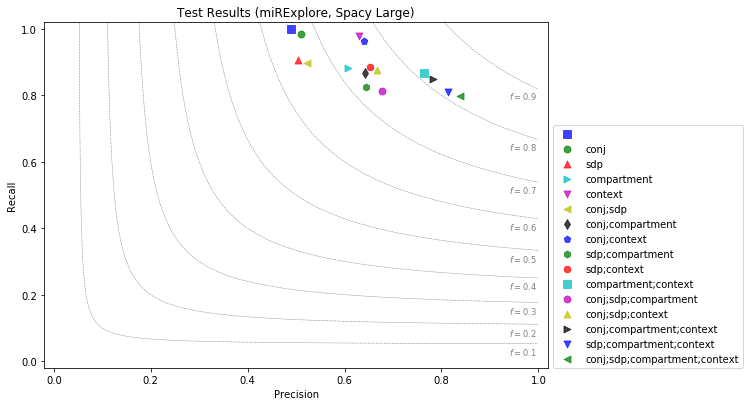

In [31]:
plot_results(testResultsSpacyLarge, "Test Results (miRExplore, Spacy Large)")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 0.5948275862068966 1.0 
1 0.6121495327102804 0.9492753623188406 conj
2 0.6079295154185022 1.0 sdp
3 0.702247191011236 0.9057971014492754 compartment
4 0.6490384615384616 0.9782608695652174 context
5 0.6267942583732058 0.9492753623188406 conj;sdp
6 0.7391304347826086 0.8623188405797102 conj;compartment
7 0.6666666666666666 0.927536231884058 conj;context
8 0.7102272727272727 0.9057971014492754 sdp;compartment
9 0.6617647058823529 0.9782608695652174 sdp;context
10 0.7672955974842768 0.8840579710144928 compartment;context
11 0.7484276729559748 0.8623188405797102 conj;sdp;compartment
12 0.6808510638297872 0.927536231884058 conj;sdp;context
13 0.8055555555555556 0.8405797101449275 conj;compartment;context
14 0.7770700636942676 0.8840579710144928 sdp;compartment;context
15 0.8169014084507042 0.8405797101449275 conj;sdp;compartment;context


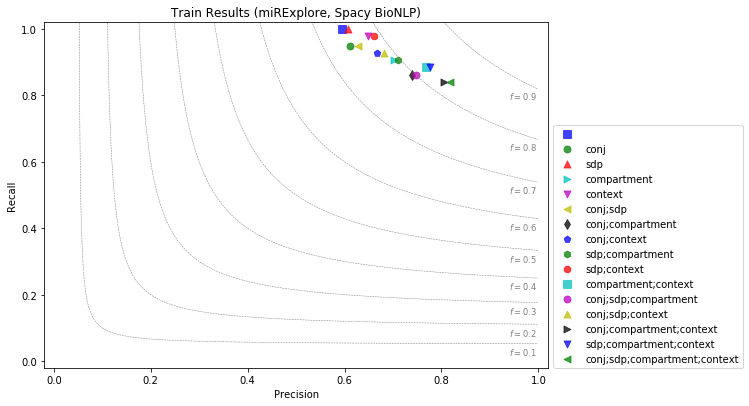

In [32]:
plot_results(trainResultsSpacyBionlp, "Train Results (miRExplore, Spacy BioNLP)")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 0.48866498740554154 1.0 
1 0.49869451697127937 0.9845360824742269 conj
2 0.5173333333333333 1.0 sdp
3 0.6137931034482759 0.9175257731958762 compartment
4 0.6584507042253521 0.9639175257731959 context
5 0.5290858725761773 0.9845360824742269 conj;sdp
6 0.6272401433691757 0.9020618556701031 conj;compartment
7 0.6690909090909091 0.9484536082474226 conj;context
8 0.6425992779783394 0.9175257731958762 sdp;compartment
9 0.6824817518248175 0.9639175257731959 sdp;context
10 0.8037383177570093 0.8865979381443299 compartment;context
11 0.6578947368421053 0.9020618556701031 conj;sdp;compartment
12 0.6943396226415094 0.9484536082474226 conj;sdp;context
13 0.8203883495145631 0.8711340206185567 conj;compartment;context
14 0.8151658767772512 0.8865979381443299 sdp;compartment;context
15 0.8325123152709359 0.8711340206185567 conj;sdp;compartment;context


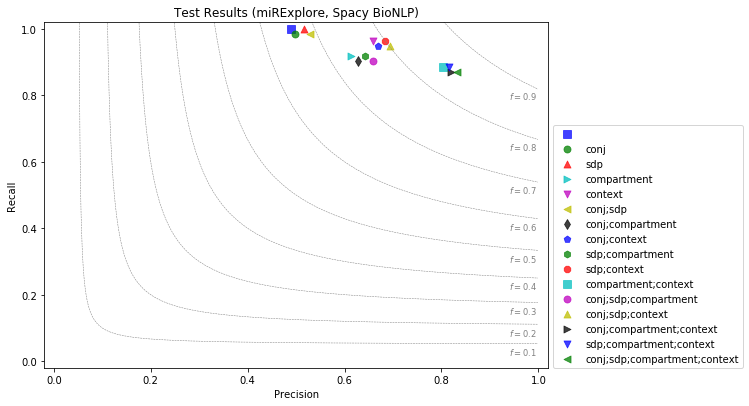

In [33]:
plot_results(testResultsSpacyBionlp, "Test Results (miRExplore, Spacy BioNLP)")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 0.41 0.45 ProMiner
1 0.92 0.82 miRTex
2 0.84 0.45 ReLeX
3 0.55 1.0 miRSel
4 0.72 0.77 miRExplore/atheMir
5 0.9558823529411765 0.9420289855072463 scispacy_large_test
6 0.8378378378378378 0.7989690721649485 spacy_large_test
7 0.8325123152709359 0.8711340206185567 spacy_bionlp_test


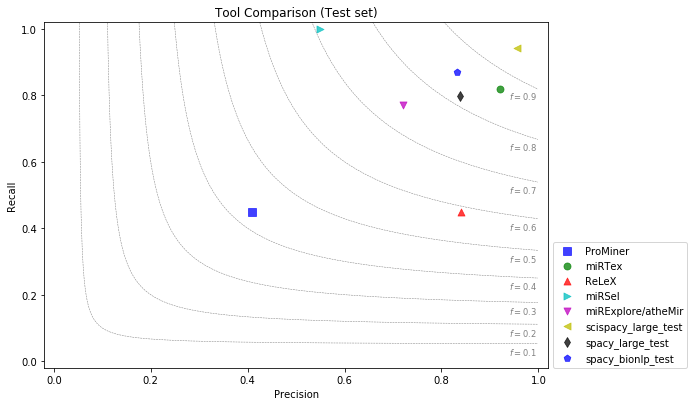

In [34]:
plot_results(all_runs, "Tool Comparison (Test set)")

In [8]:
import pickle

with open("scai_test_f1.pickle", "rb") as fout:
    test_results = pickle.load( fout)

In [38]:
test_results[()]

{'GENE_MIR_NEU': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 4},
 'GENE_MIR_UP': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 1},
 'MIR_GENE_DOWN': {'precision': 0.40625,
  'recall': 1.0,
  'f1-score': 0.5777777777777777,
  'support': 52},
 'MIR_GENE_NEU': {'precision': 1.0,
  'recall': 0.12345679012345678,
  'f1-score': 0.21978021978021975,
  'support': 81},
 'accuracy': 0.4492753623188406,
 'macro avg': {'precision': 0.3515625,
  'recall': 0.2808641975308642,
  'f1-score': 0.19938949938949938,
  'support': 138},
 'weighted avg': {'precision': 0.740036231884058,
  'recall': 0.4492753623188406,
  'f1-score': 0.3467147988887119,
  'support': 138}}

In [9]:
classify_dict = {}

for test in test_results:
    
    testdata = test_results[test]
    
    newdata = testdata["weighted avg"]
    
    classify_dict[test] = newdata

In [10]:
classify_dict

{(): {'precision': 0.740036231884058,
  'recall': 0.4492753623188406,
  'f1-score': 0.3467147988887119,
  'support': 138},
 ('compartment',): {'precision': 0.755872063968016,
  'recall': 0.5362318840579711,
  'f1-score': 0.48400302853658694,
  'support': 138},
 ('between',): {'precision': 0.7619047619047619,
  'recall': 0.5652173913043478,
  'f1-score': 0.5242035923000432,
  'support': 138},
 ('counts',): {'precision': 0.6903221942747635,
  'recall': 0.427536231884058,
  'f1-score': 0.34394338392502666,
  'support': 138},
 ('return',): {'precision': 0.3687370600414079,
  'recall': 0.5942028985507246,
  'f1-score': 0.45503874516856174,
  'support': 138},
 ('compartment', 'between'): {'precision': 0.7619047619047619,
  'recall': 0.5652173913043478,
  'f1-score': 0.5242035923000432,
  'support': 138},
 ('compartment', 'counts'): {'precision': 0.7331099272498138,
  'recall': 0.5144927536231884,
  'f1-score': 0.4788698955365622,
  'support': 138},
 ('compartment', 'return'): {'precision': 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 0.740036231884058 0.4492753623188406 
1 0.755872063968016 0.5362318840579711 compartment
2 0.7619047619047619 0.5652173913043478 between
3 0.6903221942747635 0.427536231884058 counts
4 0.3687370600414079 0.5942028985507246 return
5 0.7619047619047619 0.5652173913043478 compartment;between
6 0.7331099272498138 0.5144927536231884 compartment;counts
7 0.6813664596273292 0.6231884057971014 compartment;return
8 0.7415007449546255 0.5434782608695652 between;counts
9 0.3705292936955732 0.6014492753623188 between;return
10 0.8984610972188612 0.8623188405797102 counts;return
11 0.7415007449546255 0.5434782608695652 compartment;between;counts
12 0.7584894279519407 0.6304347826086957 compartment;between;return
13 0.9453380894691972 0.9130434782608695 compartment;counts;return
14 0.9228154568880282 0.8985507246376812 between;counts;return
15 0.9526793013749535 0.927536231884058 compartment;between;counts;return


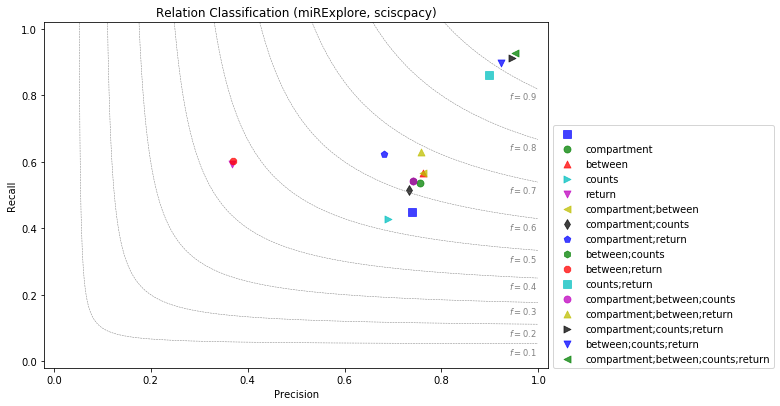

In [40]:
plot_results(classify_dict, "Relation Classification (miRExplore, sciscpacy)")